In [1]:
import shap

shap.initjs()

In [2]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
cols  = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation",
"relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country",
"income"]
df = pd.read_csv(url, header= None, names = cols, na_values = "?", skipinitialspace = True)


In [3]:
df = df.drop(['race', 'sex'],axis = 1)

In [4]:
df = df.dropna()
df.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
capital-gain,0
capital-loss,0


In [5]:
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})
print(df['income'].head(2))

0    0
1    0
Name: income, dtype: int64


In [6]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

print(df.head(2))


   age  workclass  fnlwgt  education  education-num  marital-status  \
0   39          5   77516          9             13               4   
1   50          4   83311          9             13               2   

   occupation  relationship  capital-gain  capital-loss  hours-per-week  \
0           0             1          2174             0              40   
1           3             0             0             0              13   

   native-country  income  
0              38       0  
1              38       0  


In [7]:
X = df.drop('income', axis=1)
y = df['income']


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

100%|===================| 12062/12066 [18:15<00:00]       

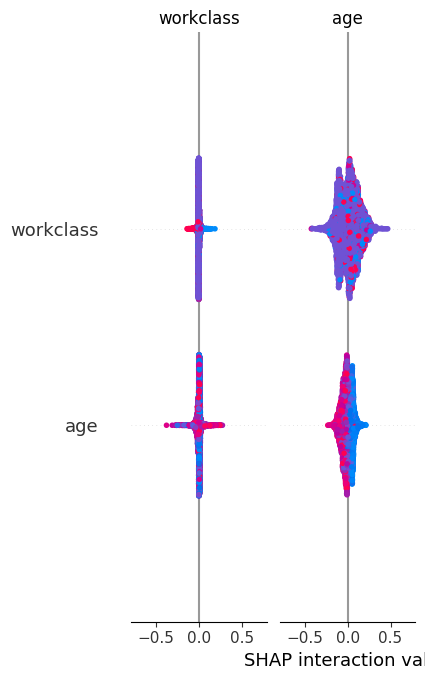

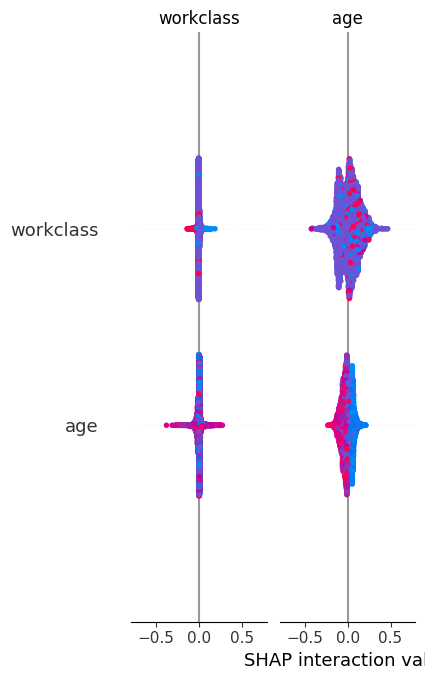

In [9]:
import shap

shap.initjs()

# Use the full test set
X_sample = X_test   # full dataset

# Create SHAP explainer for RandomForest
explainer = shap.Explainer(rf, X_train)

# Compute SHAP values (this may take several minutes)
shap_values = explainer(X_sample)

# Global SHAP plots
shap.summary_plot(shap_values, X_sample)                 # beeswarm
shap.summary_plot(shap_values, X_sample, plot_type="bar") # bar


In [ ]:
##   1. Fairness and Transparency
##      even though rmeoved sex and race column never checked if there were
##      still any kind of bias


##   2. Relationship and marital status. They shows the gender roles

##   3. Relastionship, marital status and occupation. These acts as stand ins
##      for race and gender, showing the model is still biased.

##   4. Don't approve this model. Add fairness metrics and conduct regular
##      audits before deployment